In [52]:
import matplotlib.pyplot as plt 
import panel as pn
import hvplot
pn.extension()

In [60]:
def get_nb_back_n_forth(kms_distance=1, kmh_walker_speed=4, kmh_biker_speed=20):
    time = 0 
    distance = kms_distance * 1000
    walker_speed = convert_to_ms(kmh_walker_speed)
    biker_speed = convert_to_ms(kmh_biker_speed)

    walker_distance = biker_position = 0
    biker_direction = 'forth'

    back_n_forth_times = []
    back_n_forth = 0

    while walker_distance < distance:
        # increment walker distance each step S
        time += 1
        walker_distance += walker_speed

        # Compute biker position
        if biker_direction == 'forth':
            biker_position += biker_speed
            if biker_position > distance:
                biker_direction = 'back'

        elif biker_direction == 'back':
            biker_position -= biker_speed
            if biker_position < walker_distance:
                biker_direction = 'forth'
                back_n_forth += 1
                back_n_forth_times.append([back_n_forth, time])

    return back_n_forth, back_n_forth_times


def convert_to_ms(kmh):
    return kmh * (1000/3600)


In [80]:
def plot_result(kms_distance=1, kmh_walker_speed=4, kmh_biker_speed=20):
    back_n_forth, back_n_forth_times = get_nb_back_n_forth(kms_distance, kmh_walker_speed, kmh_biker_speed)
    print(f"Total number of back_n_forth : {back_n_forth}")
    
    back_n_forths = [entry[0] for entry in back_n_forth_times]
    times = [entry[1] for entry in back_n_forth_times]

    plt.figure(figsize=(8, 4))
    plt.bar(x=times, height=back_n_forths, width=2)
    plt.xlabel("Time (s)")
    plt.ylabel("Number of back and forth")
    plt.show()


def create_plot(kms_distance=1, kmh_walker_speed=4, kmh_biker_speed=20):
    back_n_forth, back_n_forth_times = get_nb_back_n_forth(kms_distance, kmh_walker_speed, kmh_biker_speed)
    print(f"Total number of back_n_forth : {back_n_forth}")
    
    back_n_forths = [entry[0] for entry in back_n_forth_times]
    times = [entry[1] for entry in back_n_forth_times]

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(x=times, height=back_n_forths)
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Number of back and forth")

    plt.close(fig)
    return fig


Total number of back_n_forth : 11


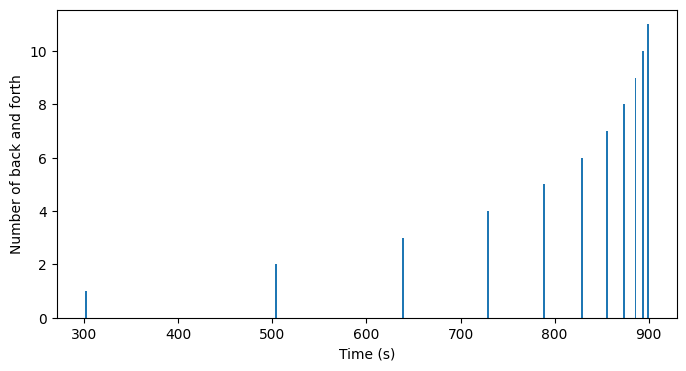

In [71]:
plot_result()

In [77]:
kms_distance = pn.widgets.FloatSlider(name="kms_distance", value=1.0, start=0.0, end=4.0)
kmh_walker_speed = pn.widgets.FloatSlider(name="kmh_walker_speed", value=4.0, start=0.0, end=8.0)
kmh_biker_speed = pn.widgets.FloatSlider(name="kmh_biker_speed", value=20.0, start=0.0, end=35.0)
background = pn.widgets.ColorPicker(name='Background', value='lightgray')

def print_nb_back_n_forth(kms_distance, kmh_walker_speed, kmh_biker_speed):
    back_n_forth, back_n_forth_times = get_nb_back_n_forth(kms_distance, kmh_walker_speed, kmh_biker_speed)
    return f"the number of back and forth is {back_n_forth}"

def styles(background):
    return {'background-color': background, 'padding': '0 10px'}

bound_fn = pn.bind(print_nb_back_n_forth, kms_distance, kmh_walker_speed, kmh_biker_speed)
pn.Column(kms_distance, 
          kmh_walker_speed, 
          kmh_biker_speed,
          background,
          pn.pane.Markdown(bound_fn, styles=pn.bind(styles, background))
          )

BokehModel(combine_events=True, render_bundle={'docs_json': {'32d89942-4de7-4a6f-a0d4-52fad3e489c3': {'version…